In [ ]:
import re 

import numpy as np

import tweepy 

from tweepy import OAuthHandler 

from textblob import TextBlob 

import matplotlib.pyplot as plt

import pandas as pd

from wordcloud import WordCloud

In [ ]:
consumer_key = 'zEP6QJWZBFXqexQDJ3oQsPawo'
consumer_secret = 'tYiLviixC2N8FzVpCirqzx7CG0e1tqn9QyViPyvBiK0luiOCit' 
access_token = '985941573790728193-jRCpOa5nynoE2OoGhIBNEFFU7MxuCcx'
access_token_secret = 'l0RCaKIpXj2ZloFYT7o4IDnpxmLRZwLVltFEMHiGHC3fH'

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)


api = tweepy.API(auth)

In [ ]:
# Input a query from the user

query = input("Please enter your topic / person of interest: ")



# Filter the query to remove retweets

filtered = query + "-filter:retweets"

# Generate the latest tweets on the given query 

tweets = tweepy.Cursor(api.search, 
                           q=filtered,
                           lang="en").items(100)

# Create a list of the tweets, the users, and their location

list1 = [[tweet.text, tweet.user.screen_name, tweet.user.location] for tweet in tweets]

Please enter your topic / person of interest: Thalapathy67


In [ ]:
df = pd.DataFrame(data=list1, 
                    columns=['tweets','user', "location"])

In [ ]:
# Convert only the tweets into a list

tweet_list = df.tweets.to_list()
print(tweet_list)

['Thalapathy67 announcement ia here....💥\n#Thalapathy67 \n#LokeshKanagaraj \n#Vikram https://t.co/vbq3MImrlW', '#SoulOfVarisu Glimpse..😭❤️👌🏻\n\nFull Song Out Today @ 5 PM 🤍\n\n#VarisuThirdSingle #ThalapathyVijay𓃵 @ActorVijay… https://t.co/ONlQ2MZo7E', 'Sources - Action King Arjun has been reportedly offered a whopping remuneration of Rs. 4.5Cr for his role in… https://t.co/zaKpATJ6Cb', '21/n (Video Proof)\n\n#Varisu #Vaarasudu #TheBossReturns #BEAST #Thalapathy67 @ActorVijay #Ranjithame #TheeThalapathy… https://t.co/I42mhKqQeD', 'This Thideer "Amma Sentiment" Turtles..\n\n#SoulOfVarisu #Varisu\n#ThalapathyVijay #Thalapathy\n#Thalapathy67… https://t.co/vdJV4NBlvf', '@VJViper_jd7 @actorvijay Congrats Mams🎉🎉🥳🥳\n#Varisu @actorvijay #Thalapathy67', 'Happy birthday to you @Tom_official123 🎂🥳🎈🎉\nHappy ya irru always ❤️\n#Varisu #Thalapathy67𓃵 @actorvijay', "What's cooking #Thalapathy67 @Dir_Lokesh @MrRathna @actorvijay", 'Man of mass🤩🔥🔥#theethalapathy\n#VarisuAudioLaunch \n#thalapathy67\n#Var

In [ ]:
# Create a function to clean the tweets.unnecessary characters, spaces, and stopwords.

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    r = tweet.lower()
    r = re.sub("'", "", r) # This is to avoid removing contractions in english
    r = re.sub("@[A-Za-z0-9_]+","", r)
    r = re.sub("#[A-Za-z0-9_]+","", r)
    r = re.sub(r'http\S+', '', r)
    r = re.sub('[()!?]', ' ', r)
    r = re.sub('\[.*?\]',' ', r)
    r = re.sub("[^a-z0-9]"," ", r)
    r = r.split()
    stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]
    r = [w for w in r if not w in stopwords]
    r = " ".join(word for word in r)
    return r

In [ ]:
cleaned = [clean_tweet(tw) for tw in tweet_list]
cleaned

<ipython-input-7-f8a3de9d94f9>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


['thalapathy67 announcement ia here',
 'glimpse full song out today 5 pm',
 'sources action king arjun has been reportedly offered whopping remuneration rs 4 5cr his role',
 '21 n video proof',
 'this thideer amma sentiment turtles',
 'congrats mams',
 'happy birthday you happy ya irru always',
 'whats cooking',
 'man mass',
 'thalapathy anna attending baby shower function cute couples amp',
 'thalapathy gifting graphite art baby shower function',
 'promotion sir',
 'thalapathy67 box office all records break create new record',
 '40 feet cutout placed at spi s2 theyagaraja cinemas thiruvanmiyur',
 'thalapathy anna attending baby shower function cute couples amp',
 'one only monarch indian cinema industry name is annaaa potency fanb',
 'amna song',
 '',
 'boss is coming',
 'only hype south cinema king',
 'happy birthday bro',
 'mrunal thakur wallpaper',
 '',
 'song year',
 'thank you anna',
 'single announcement posters waiting audio launch amp trailer announcement posters',
 'promo 1 1

In [ ]:
# Define the sentiment objects using TextBlob

sentiment_objects = [TextBlob(tweet) for tweet in cleaned]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.0, TextBlob("thalapathy67 announcement ia here"))

In [ ]:
# Create a list of polarity values and tweet text

sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

# Print the value of the 0th row.

sentiment_values[0]

[0.0, 'thalapathy67 announcement ia here']

In [ ]:
# Print all the sentiment values

sentiment_values[0:99]

[[0.0, 'thalapathy67 announcement ia here'],
 [0.35, 'glimpse full song out today 5 pm'],
 [0.1,
  'sources action king arjun has been reportedly offered whopping remuneration rs 4 5cr his role'],
 [0.0, '21 n video proof'],
 [0.0, 'this thideer amma sentiment turtles'],
 [0.0, 'congrats mams'],
 [0.8, 'happy birthday you happy ya irru always'],
 [0.0, 'whats cooking'],
 [0.0, 'man mass'],
 [0.5, 'thalapathy anna attending baby shower function cute couples amp'],
 [0.0, 'thalapathy gifting graphite art baby shower function'],
 [0.0, 'promotion sir'],
 [0.13636363636363635,
  'thalapathy67 box office all records break create new record'],
 [0.0, '40 feet cutout placed at spi s2 theyagaraja cinemas thiruvanmiyur'],
 [0.5, 'thalapathy anna attending baby shower function cute couples amp'],
 [0.0, 'one only monarch indian cinema industry name is annaaa potency fanb'],
 [0.0, 'amna song'],
 [0.0, ''],
 [0.0, 'boss is coming'],
 [0.0, 'only hype south cinema king'],
 [0.8, 'happy birthday br

In [ ]:
# Create a dataframe of each tweet against its polarity

sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df

,polarity,tweet
0,0.0000,thalapathy67 announcement ia here
1,0.3500,glimpse full song out today 5 pm
2,0.1000,sources action king arjun has been reportedly ...
3,0.0000,21 n video proof
4,0.0000,this thideer amma sentiment turtles
...,...,...
95,0.0000,sureshot bb hit
96,0.0000,
97,0.0000,
98,-0.0625,will be highest grosser ww cant be ruled out d...


In [ ]:
# Save the polarity column as 'n'.

n=sentiment_df["polarity"]

# Convert this column into a series, 'm'. 

m=pd.Series(n)

m

0     0.0000
1     0.3500
2     0.1000
3     0.0000
4     0.0000
       ...  
95    0.0000
96    0.0000
97    0.0000
98   -0.0625
99    0.7000
Name: polarity, Length: 100, dtype: float64

In [ ]:
# Initialize variables, 'pos', 'neg', 'neu'.

pos=0
neg=0
neu=0

# Create a loop to classify the tweets as Positive, Negative, or Neutral.
# Count the number of each.

for items in m:
    if items>0:
        print("Positive")
        pos=pos+1
    elif items<0:
        print("Negative")
        neg=neg+1
    else:
        print("Neutral")
        neu=neu+1
        
print(pos,neg,neu)

Neutral
Positive
Positive
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Positive
Neutral
Neutral
Positive
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Negative
Neutral
Neutral
Neutral
Positive
Positive
Positive
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Positive
Neutral
Positive
Neutral
Neutral
Neutral
Positive
Neutral
Positive
Positive
Positive
Neutral
Positive
Negative
Positive
Neutral
Negative
Positive
Positive
Positive
Positive
Neutral
Neutral
Positive
Positive
Positive
Neutral
Positive
Positive
Positive
Neutral
Neutral
Negative
Neutral
Neutral
Positive
Positive
Neutral
Positive
Positive
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Negative
Positive
36 5 59


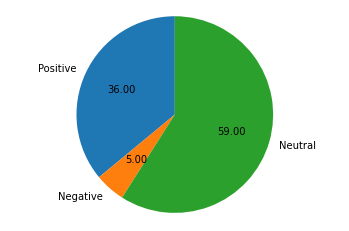

In [ ]:
pieLabels=["Positive","Negative","Neutral"]

populationShare=[pos,neg,neu]

figureObject, axesObject = plt.subplots()

axesObject.pie(populationShare,labels=pieLabels,autopct='%1.2f',startangle=90)

axesObject.axis('equal')

plt.show()

In [ ]:
# Display the number of twitter users who feel a certain way about the given topic.

print("%f percent of twitter users feel positive about %s"%(pos,query))

print("%f percent of twitter users feel negative about %s"%(neg,query))

print("%f percent of twitter users feel neutral about %s"%(neu,query))

36.000000 percent of twitter users feel positive about Thalapathy67
5.000000 percent of twitter users feel negative about Thalapathy67
59.000000 percent of twitter users feel neutral about Thalapathy67


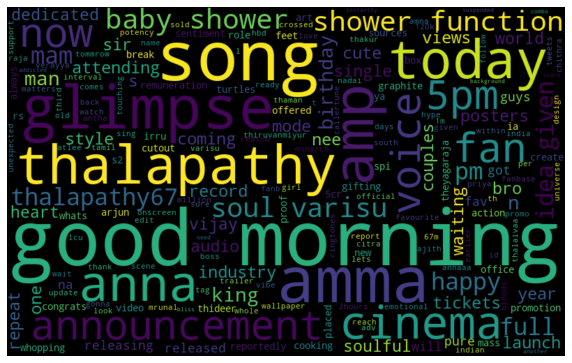

In [ ]:
# Create a Wordcloud from the tweets

all_words = ' '.join([text for text in cleaned])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()